In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Data source:
https://www.kaggle.com/binovi/wholesale-customers-data-set

In [3]:
wholesale_data = pd.read_csv('datasets/Wholesale_customers.csv',
                             sep=r'\s*,\s*', 
                             engine='python')

In [4]:
len(wholesale_data)

440

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories
	
    Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

Delicatessens offer a variety of beverages, such as pre-packaged soft drinks, coffee, tea and milk. Potato chips and similar products, newspapers and small items such as candy and mints are also usually available.

In [5]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


How do we find the maximum or minimum amount spent on a particular item?

In [6]:
max(wholesale_data.Grocery)

92780

In [7]:
min(wholesale_data.Grocery)

3

What is the maximum amount spent in this dataset? On which item was it spent?

We will create a dictionary with max for each item stored for every category of items, and then appy the max function on it. We can calculate the max as either the max spend by one customer, or max of the sum all purchases by all clients.

In [8]:
column_names = list(wholesale_data)
print(column_names)

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [9]:
max_dict={column_names[2]:max(wholesale_data.Fresh),
          column_names[3]:max(wholesale_data.Milk),
          column_names[4]:max(wholesale_data.Grocery),
          column_names[5]:max(wholesale_data.Frozen),
          column_names[6]:max(wholesale_data.Detergents_Paper),
          column_names[7]:max(wholesale_data.Delicassen)}

In [10]:
max_dict

{'Delicassen': 47943,
 'Detergents_Paper': 40827,
 'Fresh': 112151,
 'Frozen': 60869,
 'Grocery': 92780,
 'Milk': 73498}

In [11]:
max(max_dict, key=max_dict.get)

'Fresh'

This is the max spend by a single client

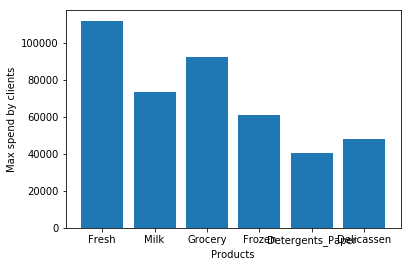

In [12]:
plt.bar(range(len(max_dict)), 
        list(max_dict.values()), 
        align='center')

plt.xticks(range(len(max_dict)), 
           list(max_dict.keys()))

plt.xlabel('Products')
plt.ylabel('Max spend by clients')

plt.show()

In [13]:
sum_dict={column_names[2]:sum(wholesale_data.Fresh),
          column_names[3]:sum(wholesale_data.Milk),
          column_names[4]:sum(wholesale_data.Grocery),
          column_names[5]:sum(wholesale_data.Frozen),
          column_names[6]:sum(wholesale_data.Detergents_Paper),
          column_names[7]:sum(wholesale_data.Delicassen)}

sum_dict

{'Delicassen': 670943,
 'Detergents_Paper': 1267857,
 'Fresh': 5280131,
 'Frozen': 1351650,
 'Grocery': 3498562,
 'Milk': 2550357}

In [14]:
max(sum_dict, key = sum_dict.get)

'Fresh'

This is the max spend amongst all clients put together.

Expenditure on fresh products seems to be the highest in both cases.

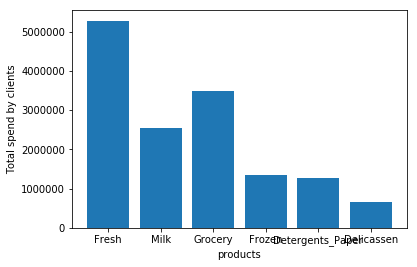

In [15]:
plt.bar(range(len(sum_dict)), 
        list(sum_dict.values()), 
        align='center')

plt.xticks(range(len(sum_dict)), 
           list(sum_dict.keys()))

plt.xlabel('products')
plt.ylabel('Total spend by clients')

plt.show()

### Average

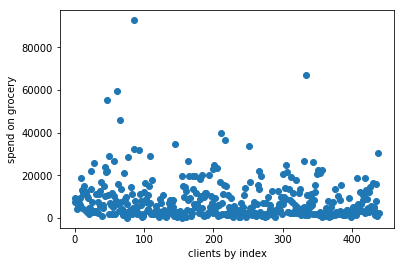

In [16]:
plt.scatter(wholesale_data.index,
            wholesale_data.Grocery)

plt.xlabel('clients by index')
plt.ylabel('spend on grocery')

plt.show()

This is how the expenditure on Grocery varies across the various clients of our wholesale dealer. There are many clients who spend minimally everywhere, indicated by the cluster of points near zero. As rate increases, the density of customers decreases. There are very few clients spending beyond 50K a year.

On an average, how much do clients spend on the various food items?

In [17]:
av = sum(wholesale_data.Grocery)/len(wholesale_data.Grocery)

av

7951.277272727273

In [18]:
monthly = av/12

monthly

662.6064393939395

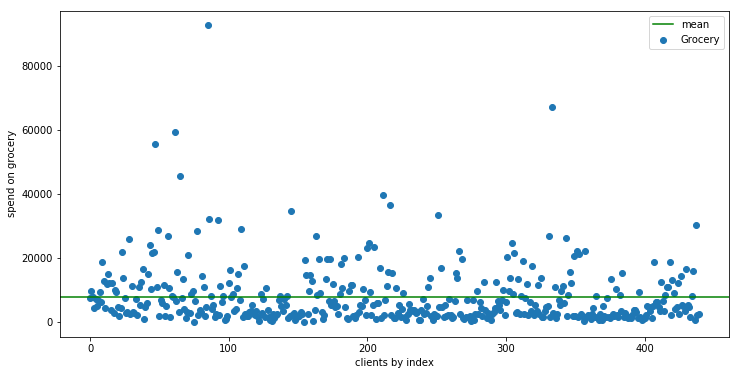

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(wholesale_data.index,
            wholesale_data.Grocery)

ax.axhline(y=av, label="mean",color='green')

plt.xlabel('clients by index')
plt.ylabel('spend on grocery')

ax.legend()

plt.show()

### Measures of central tendency

In [20]:
print('Mean:', np.mean(wholesale_data.Grocery))

Mean: 7951.277272727273


In [21]:
np.median(wholesale_data.Grocery)

4755.5

Lets try to visually understand what these points indicate

In [22]:
minvalue=min(wholesale_data.Grocery)
maxvalue=max(wholesale_data.Grocery)
meanvalue=np.mean(wholesale_data.Grocery)
medianvalue=np.median(wholesale_data.Grocery)

points=[minvalue, maxvalue, meanvalue, medianvalue]
names=["min","max","mean","mid"]

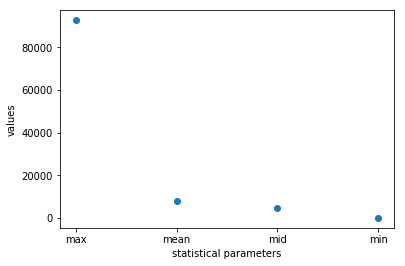

In [23]:
plt.scatter(names,
            points)

plt.xlabel('statistical parameters')
plt.ylabel('values')

plt.show()

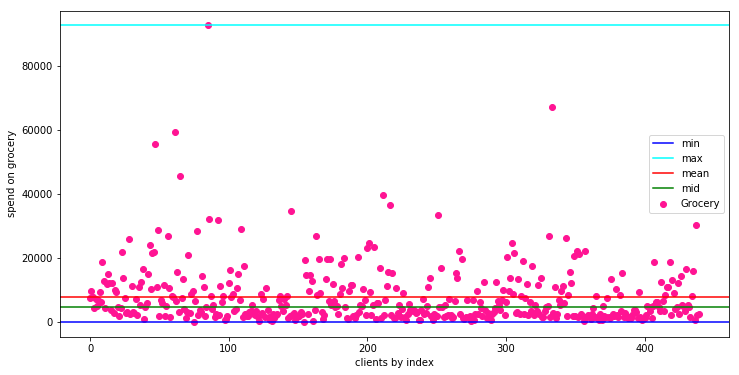

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(wholesale_data.index,
            wholesale_data.Grocery,
            color="deeppink")

ax.axhline(y=minvalue, label="min",color='blue')
ax.axhline(y=maxvalue, label="max",color='cyan')
ax.axhline(y=meanvalue, label="mean",color='red')
ax.axhline(y=medianvalue, label="mid",color='green')

plt.xlabel('clients by index')
plt.ylabel('spend on grocery')
ax.legend()
plt.show()

The above graph shows how the min, max, average and median values vary for the Grocery distribution. We see that the median/mid value, is clearly nowhere close to the mean. And in our case, the median lies close to the bottom of the graph. This is because our graph is densely populated closer to the lower end, meaning there are more data points there.

Let us understand the median in another context

In [25]:
y = [1,3,5,7,11]

np.median(y)

5.0

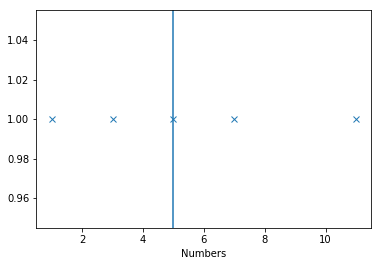

In [26]:
plt.plot(y, len(y) * [1], "x")
plt.axvline(x = np.median(y))

plt.xlabel('Numbers')
plt.show()

Median corresponds to a data point

In [27]:
y = [1,3,5,7,11,13,17,19]

np.median(y)

9.0

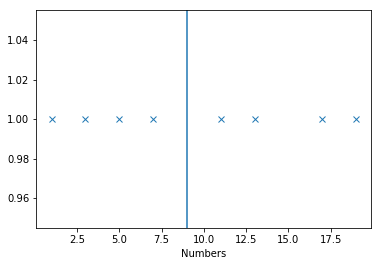

In [28]:
plt.plot(y, len(y) * [1], "x")
plt.axvline(x = np.median(y))

plt.xlabel('Numbers')
plt.show()

Median does not correspond to a data point

#### Mode
Gives the element that is repeated most times in the distribution
the count parameter tells us how many times

In [29]:
stats.mode(["apple","ball","cat","dog","elephant"])

ModeResult(mode=array(['apple'], dtype='<U8'), count=array([1]))

As there is no clear mode, the first element is given as the output. Count=1 is an idication of this fact.

In [30]:
stats.mode(["apple","ball","ball","cat","cat","cat"])

ModeResult(mode=array(['cat'], dtype='<U5'), count=array([3]))

In [31]:
stats.mode(["apple","ball","ball","ball","cat","cat","cat"])

ModeResult(mode=array(['ball'], dtype='<U5'), count=array([3]))

When there are multiple elements repeated equal number of times, the first element that is repeated is taken as the mode

#### Range - A measure of variability
ptp stands for peak to peak
gives the range of values (maximum - minimum) along an axis.

In [32]:
np.ptp(wholesale_data.Grocery)

92777

This shows the variation in the amount spent by different clients annually, in monetary units. The huge variation can be an indication of the factor that customers vary from small, individual families to wholesale units/distributors.

#### Percentile

In [33]:
np.percentile(wholesale_data.Grocery, 
              [10 ,50, 90])

array([ 1381.9,  4755.5, 18910.1])

#### Interquartile range

In [34]:
q75, q25 = np.percentile(wholesale_data.Grocery, 
                         [75 ,25])

q75 - q25

8502.75

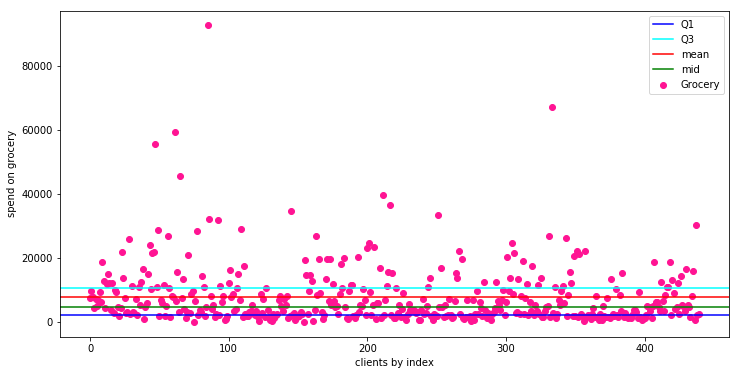

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(wholesale_data.index,
            wholesale_data.Grocery,
            color="deeppink")

ax.axhline(y=q25, label="Q1",color='blue')
ax.axhline(y=q75, label="Q3",color='cyan')
ax.axhline(y=meanvalue, label="mean",color='red')
ax.axhline(y=medianvalue, label="mid",color='green')

plt.xlabel('clients by index')
plt.ylabel('spend on grocery')
ax.legend()
plt.show()

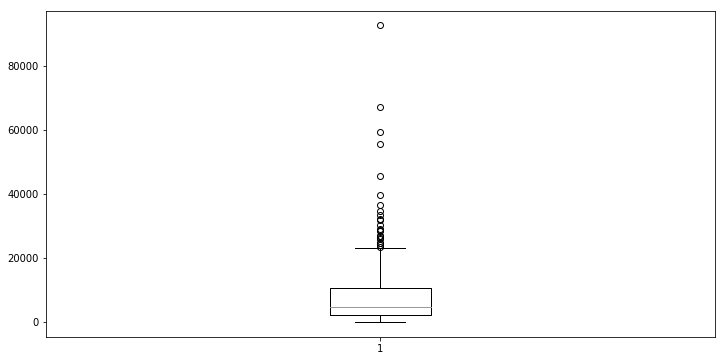

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.boxplot(wholesale_data.Grocery)

plt.show()

#### std deviation
Shows how much the age of adults in this distribution varies from the mean

In [37]:
print(np.std(wholesale_data.Grocery))

9492.35763751948


In [38]:
print(np.mean(wholesale_data.Grocery))
print(np.max(wholesale_data.Grocery))
print(np.min(wholesale_data.Grocery))

7951.277272727273
92780
3


We will now see what this std deviation translates to

In [39]:
meanplusstddev = np.mean(wholesale_data.Grocery) + np.std(wholesale_data.Grocery)
meanminusstddev = np.mean(wholesale_data.Grocery) - np.std(wholesale_data.Grocery)

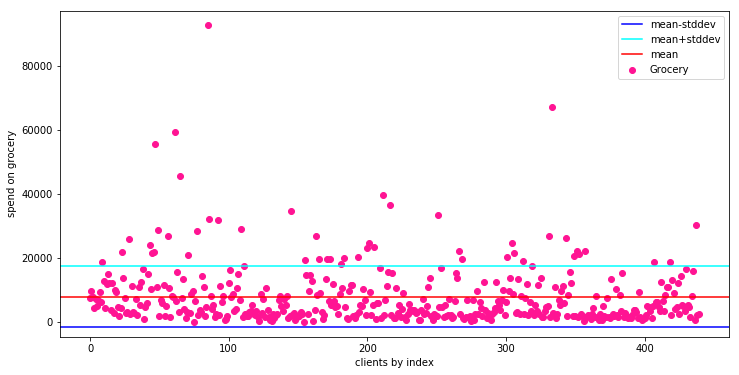

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(wholesale_data.index,
            wholesale_data.Grocery,
            color="deeppink")

ax.axhline(y=meanminusstddev, label="mean-stddev",color='blue')
ax.axhline(y=meanplusstddev, label="mean+stddev",color='cyan')
ax.axhline(y=meanvalue, label="mean",color='red')

plt.xlabel('clients by index')
plt.ylabel('spend on grocery')
ax.legend()
plt.show()

A large standard deviation indicates that the data points are spread far from the mean and a small standard deviation indicates that they are clustered closely around the mean.

Shows that the standard deviaion in the expenditure for Grocery amongst the customers of the wholesale dealer is very high. This shows that the data is spread out heavily. This could be because the customers of this dealer varies from general small families to maybe of the order of departmental stores. The huge difference between max and min values also indicates the same.

Also notice that most of the data points lie within the mean+-std deviation range


#### variance

In [41]:
np.var(wholesale_data.Grocery)

90104853.51857442

Variance measures how far a data set is spread out. The technical definition is “The average of the squared differences from the mean,” but all it really does is to give you a very general idea of the spread of your data. A value of zero means that there is no variability; All the numbers in the data set are the same.

#### standard error of mean
Standard error is the approximate standard deviation of a statistical sample population. 
Standard error is a statistical term that measures the accuracy with which a sample represents a population. 
In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error.

In [42]:
stats.sem(wholesale_data.Grocery)

453.04551184777074

### Correlation and Covariance

Correlation values range between -1 and 1.
There are two key components of a correlation value:

magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.

Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.


The covariance between two variables is positive when they tend to move in the same direction and negative if they tend to move in opposite directions.

To see how we arrive at the definition, first think about two variables each with mean zero. That is, each variable could be positive or negative but is on average zero. To summarize whether the two variables move together, we can look at the product: 
When both variables have the same sign, it's positive;
When they have opposite signs, it's negative;
When they are both large and have the same sign, you get a big positive number;
When they are both large and have opposite signs, you get a big negative number;

In [43]:
np.corrcoef(wholesale_data.Fresh,
            wholesale_data.Frozen)

array([[1.        , 0.34588146],
       [0.34588146, 1.        ]])

The above matrix gives correlation of fresh products with frozen products, fresh products with fresh products, frozen products with fresh products, frozen products with frozen products.

In [44]:
np.corrcoef(wholesale_data.Fresh,
            wholesale_data.Grocery)

array([[ 1.        , -0.01185387],
       [-0.01185387,  1.        ]])

In [45]:
np.corrcoef(wholesale_data.Grocery,
            wholesale_data.Frozen)

array([[ 1.        , -0.04019274],
       [-0.04019274,  1.        ]])

The total expenditure on fresh and frozen products have the most correlation in this dataset; while that between fresh products and groceries has the least connection.

In [46]:
np.cov(wholesale_data.Fresh,
       wholesale_data.Frozen)

array([[1.59954927e+08, 2.12366546e+07],
       [2.12366546e+07, 2.35678532e+07]])

In [47]:
np.cov(wholesale_data.Fresh,
       wholesale_data.Grocery)

array([[ 1.59954927e+08, -1.42471280e+06],
       [-1.42471280e+06,  9.03101038e+07]])

In [48]:
np.cov(wholesale_data.Grocery,
       wholesale_data.Frozen)

array([[90310103.75437981, -1854281.91954856],
       [-1854281.91954856, 23567853.16618347]])

The most variation is clearly in the expenditure of fresh products with a very high covariance with itself, followed by that on frozen products

### Let's understand correlation. We define an array x.
Use 250 random integers between 0 and 500

In [49]:
np.random.seed(1)

x = np.random.randint(0, 500, 250)

#### Introduce randomness in the data
Defining some random integers to introduce randomness into the data

In [50]:
variation = np.random.normal(0, 100, 250)

#### Positive Correlation with some noise - as y has something added to x, As x increases, so does y

In [51]:
y_poscor = x + variation

print(np.corrcoef(x,y_poscor))

[[1.         0.81711152]
 [0.81711152 1.        ]]


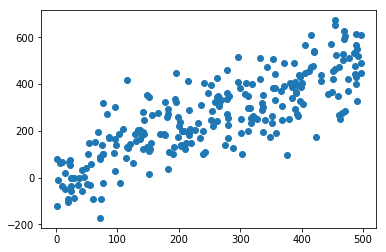

In [52]:
plt.scatter(x, y_poscor)

plt.show()

#### Negative Correlation with some noise - as x is subtracted from y. as x increases,  decreses.

In [53]:
y_negcor = 100 - x + variation

print(np.corrcoef(x,y_negcor))

[[ 1.         -0.83521732]
 [-0.83521732  1.        ]]


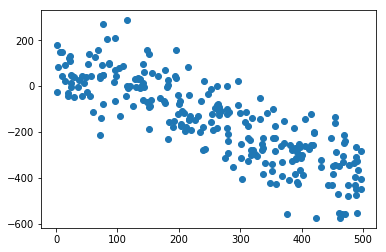

In [54]:
plt.scatter(x, y_negcor)
plt.show()

#### No/weak correlation - y does not depend on the value of x

In [55]:
y_nocor = variation

print(np.corrcoef(x,y_nocor))

[[ 1.         -0.05062585]
 [-0.05062585  1.        ]]


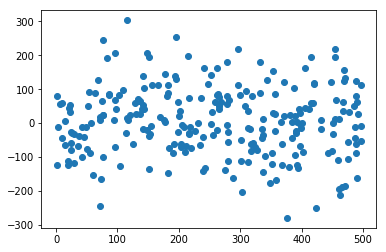

In [56]:
plt.scatter(x, y_nocor)
plt.show()

#### Standardization

Let's say we have a dataset that has the prices for different vegetables and fruits bought by a certain dealer. 

Data source - https://www.foodcoop.com/produce/

In [57]:
prices_data = pd.read_csv('datasets/prices.csv',
                          sep=r'\s*,\s*', 
                          engine='python')

In [58]:
prices_data

,PRODUCT,QUANTITY (pound),RETAIL PRICE(dollars)
0,Tomatoes,10,28.60
1,Potatoes,8,10.40
2,Red Leaf Lettuce (organic),5,17.70
3,cauliflower,6,15.66
4,carrots,10,25.90
5,Iceberg lettuce,3,4.62
6,oranges,15,30.30
7,grapes,5,11.80
8,peppers yellow organic,3,13.65
9,blackberries,7,29.40


At first glance, looking at just the prices, we can say that oranges are the costliest. Carrots are costlier than lettuce. But let's hold back a minute and look at the quantities column. The prices metioned are for different weights for different products. So, if we want to compare the cost of these products, it is not fair to compare these directly.

In [59]:
prices_data['ratio'] = prices_data["RETAIL PRICE(dollars)"] / prices_data["QUANTITY (pound)"]

In [60]:
prices_data

,PRODUCT,QUANTITY (pound),RETAIL PRICE(dollars),ratio
0,Tomatoes,10,28.60,2.86
1,Potatoes,8,10.40,1.30
2,Red Leaf Lettuce (organic),5,17.70,3.54
3,cauliflower,6,15.66,2.61
4,carrots,10,25.90,2.59
5,Iceberg lettuce,3,4.62,1.54
6,oranges,15,30.30,2.02
7,grapes,5,11.80,2.36
8,peppers yellow organic,3,13.65,4.55
9,blackberries,7,29.40,4.20


What we have done is reduced all the prices to cost per pound. In fact, our assumption was not completely correct. Looking at the prices per pound, we can say that organic yellow peppers are the costliest, although carrots are still costlier than lettuce.

What we can do here is 'normalise' the dataframe. We consider our data with context.

Normalisation can be of different types 
* normalise by a constant - Normalize a dataset by dividing each data point by a constant, such as the standard deviation of the data.
* normalise to [0,1] - Normalize a dataset by dividing each data point by the norm of the dataset.
* normalise to any interval - Normalize a dataset to an interval [a, b] where a, b are real numbers.



Let us try to calculate the z score of each value in the sample, relative to the sample mean and standard deviation., to see if we can understand this more intuitively.

A z-score (aka, a standard score) indicates how many standard deviations an element is from the mean. 


In [61]:
prices_data['zscore'] = stats.zscore(prices_data.ratio) 

prices_data

,PRODUCT,QUANTITY (pound),RETAIL PRICE(dollars),ratio,zscore
0,Tomatoes,10,28.60,2.86,0.101612
1,Potatoes,8,10.40,1.30,-1.437369
2,Red Leaf Lettuce (organic),5,17.70,3.54,0.772450
3,cauliflower,6,15.66,2.61,-0.145019
4,carrots,10,25.90,2.59,-0.164750
5,Iceberg lettuce,3,4.62,1.54,-1.200603
6,oranges,15,30.30,2.02,-0.727070
7,grapes,5,11.80,2.36,-0.391651
8,peppers yellow organic,3,13.65,4.55,1.768842
9,blackberries,7,29.40,4.20,1.423558


The zscore column will help us understand the absolute cost of different products, the value of where the product stands when compared to the other products. All those with negative costs have unit price lesser than the average, while those with positive numbers are priced higher than average. 

### Basic Stats on dataframes
The describe() function gives the statistical description of the dataset. The count, max, min, mean etc for every variable in this dataset

In [62]:
wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [63]:
wholesale_data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [64]:
wholesale_data.cov()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,0.219072,0.022479,-1.001431e+03,1.591511e+03,2.707890e+03,-4.590964e+02,1.419358e+03,7.393256e+01
Region,0.022479,0.599498,5.413960e+02,1.845044e+02,5.662581e+01,-7.910183e+01,-5.473509e+00,9.872201e+01
Fresh,-1001.431156,541.395998,1.599549e+08,9.381789e+06,-1.424713e+06,2.123665e+07,-6.147826e+06,8.727310e+06
Milk,1591.510799,184.504437,9.381789e+06,5.446997e+07,5.108319e+07,4.442612e+06,2.328834e+07,8.457925e+06
Grocery,2707.889812,56.625813,-1.424713e+06,5.108319e+07,9.031010e+07,-1.854282e+06,4.189519e+07,5.507291e+06
Frozen,-459.096397,-79.101833,2.123665e+07,4.442612e+06,-1.854282e+06,2.356785e+07,-3.044325e+06,5.352342e+06
Detergents_Paper,1419.357559,-5.473509,-6.147826e+06,2.328834e+07,4.189519e+07,-3.044325e+06,2.273244e+07,9.316807e+05
Delicassen,73.932564,98.722008,8.727310e+06,8.457925e+06,5.507291e+06,5.352342e+06,9.316807e+05,7.952997e+06


One can also find the correlation between just some specific variables in the dataset

In [65]:
print( wholesale_data[['Fresh','Frozen']].corr())

           Fresh    Frozen
Fresh   1.000000  0.345881
Frozen  0.345881  1.000000
